This is my first attempt at trying to perform preprocessing on PPG data to get clean values. This dataset was obtained [**here**](https://www.kaggle.com/datasets/krishd123/ppg-collection-for-cognitive-strain).

In [20]:
# Handling initial imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# Reading data from low and high workload files for Patient 2
data_file_low = pd.read_csv("Data\PPG for Cognitive Strain\Low_MWL\Low_MWL\p2l.csv")
print(data_file_low)

data_file_high = pd.read_csv("Data\PPG for Cognitive Strain\High_MWL\High_MWL\p2h.csv")
print(data_file_high)

       Trial 1:0back  Trial 6:0back
0             32.862         34.755
1             32.839         34.676
2             32.838         34.597
3             32.861         34.517
4             32.910         34.436
...              ...            ...
76795         38.499         33.383
76796         38.439         33.416
76797         38.381         33.467
76798         38.326         33.538
76799         38.276         33.631

[76800 rows x 2 columns]
       Trial 3:3back  Trial 5:3back
0             35.228         35.968
1             35.194         35.932
2             35.158         35.901
3             35.120         35.875
4             35.080         35.853
...              ...            ...
76795         34.093         35.634
76796         34.097         35.599
76797         34.105         35.562
76798         34.118         35.525
76799         34.137         35.489

[76800 rows x 2 columns]


0        32.862
1        32.839
2        32.838
3        32.861
4        32.910
          ...  
76795    38.499
76796    38.439
76797    38.381
76798    38.326
76799    38.276
Name: Trial 1:0back, Length: 76800, dtype: float64
[0.00000000e+00 3.90625000e-03 7.81250000e-03 ... 2.99988281e+02
 2.99992188e+02 2.99996094e+02]


Text(0.5, 1.0, 'PPG Signal 1: Low Workload')

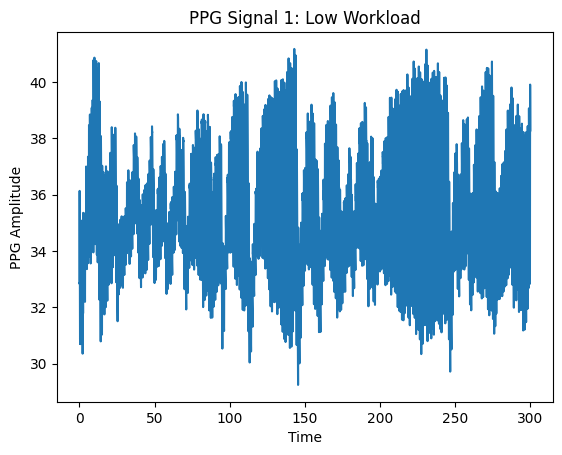

In [22]:
#Extracting PPG Signal 1
signal = data_file_low['Trial 1:0back']
print(signal)

#Setting sampling rate to 256 Hz
sampling_rate = 256

#Creating a time array based on the sampling rate and length of PPG values
signal_time = np.arange(len(signal))/sampling_rate

#Plot the PPG over time
plt.plot(signal_time, signal)
plt.xlabel("Time")
plt.ylabel("PPG Amplitude")
plt.title("PPG Signal 1: Low Workload")
